In [2]:
import numpy as np
import pandas as pd
import numpy.ma as ma
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 25,10
from astropy.io import fits
from astropy import modeling
from scipy import interpolate
from scipy import optimize
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from astropy.stats import median_absolute_deviation
from scipy.optimize import leastsq
hdu_list = fits.open('/storage/home/nxt5197/work/530_stellar_atmospheres/project/NLTT43564/Slope-20220301T114303_R01.optimal.fits')

hdu_list.info()

hdu_list[0].header['OBJECT']

Filename: /storage/home/nxt5197/work/530_stellar_atmospheres/project/NLTT43564/Slope-20220301T114303_R01.optimal.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     406   ()      
  1  Sci Flux      1 ImageHDU        12   (2048, 28)   float32   
  2  Sky Flux      1 ImageHDU        12   (2048, 28)   float32   
  3  Cal Flux      1 ImageHDU        12   (2048, 28)   float32   
  4  Sci Variance    1 ImageHDU        12   (2048, 28)   float32   
  5  Sky Variance    1 ImageHDU        12   (2048, 28)   float32   
  6  Cal Variance    1 ImageHDU        12   (2048, 28)   float32   
  7  Sci Wavl      1 ImageHDU        37   (2048, 28)   float64   
  8  Sky Wavl      1 ImageHDU        37   (2048, 28)   float64   
  9  Cal Wavl      1 ImageHDU        37   (2048, 28)   float64   


'NLTT_43564'

In [3]:
#flux values in science, sky, and calibrator data
#each one contains 28 lists of flux values corresponding to the 28 spectral orders
sci=hdu_list[1].data
sky=hdu_list[2].data
cal=hdu_list[3].data

scivar=hdu_list[4].data
skyvar=hdu_list[5].data
calvar=hdu_list[6].data

#x values for science and sky fiber data
scix=hdu_list[7].data
skyx=hdu_list[8].data
calx=hdu_list[9].data

#convert NaN pixels to 0
nans=np.isnan(sky)
sky[nans]=0

nans=np.isnan(sci)
sci[nans]=0

In [46]:
ysci=list(sci[0])
ysky=list(sky[0])
ycal=list(cal[0])

yscivar=list(scivar[0])
yskyvar=list(skyvar[0])
ycalvar=list(calvar[0])

xsci=list(scix[0])
xsky=list(skyx[0])
xcal=list(calx[0])

for i in range(1,28):
    ysci+=list(sci[i])
    ysky+=list(sky[i])
    ycal+=list(cal[i])
    yscivar+=list(scivar[i])
    yskyvar+=list(skyvar[i])
    ycalvar+=list(calvar[i])
    xsci+=list(scix[i])
    xsky+=list(skyx[i])
    xcal+=list(calx[i])
subtractedy = ysci - np.interp(xsci,xsky,ysky)
calibratedy = subtractedy + np.interp(xsci,xcal,ycal)

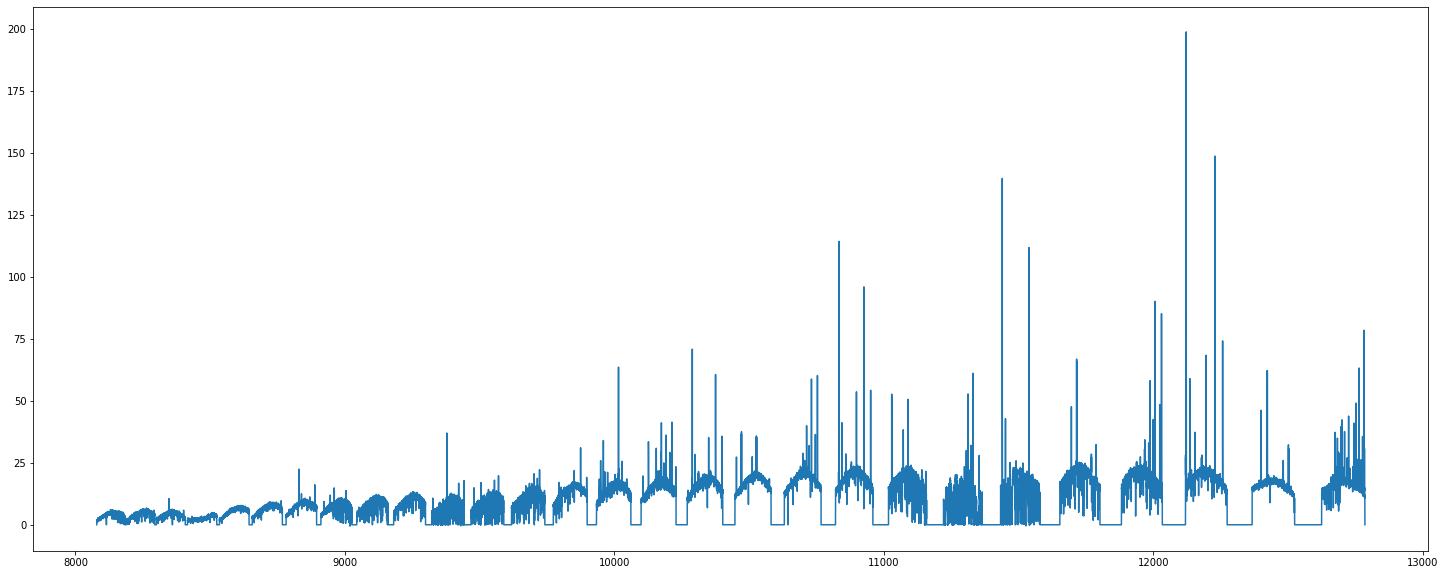

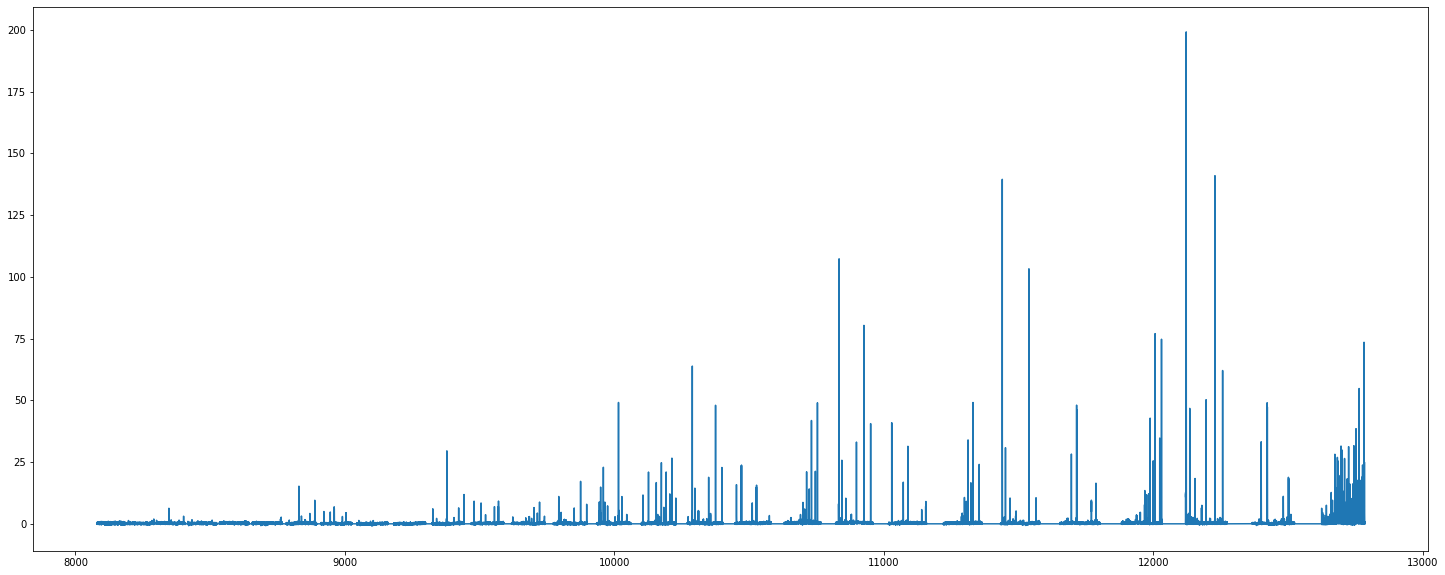

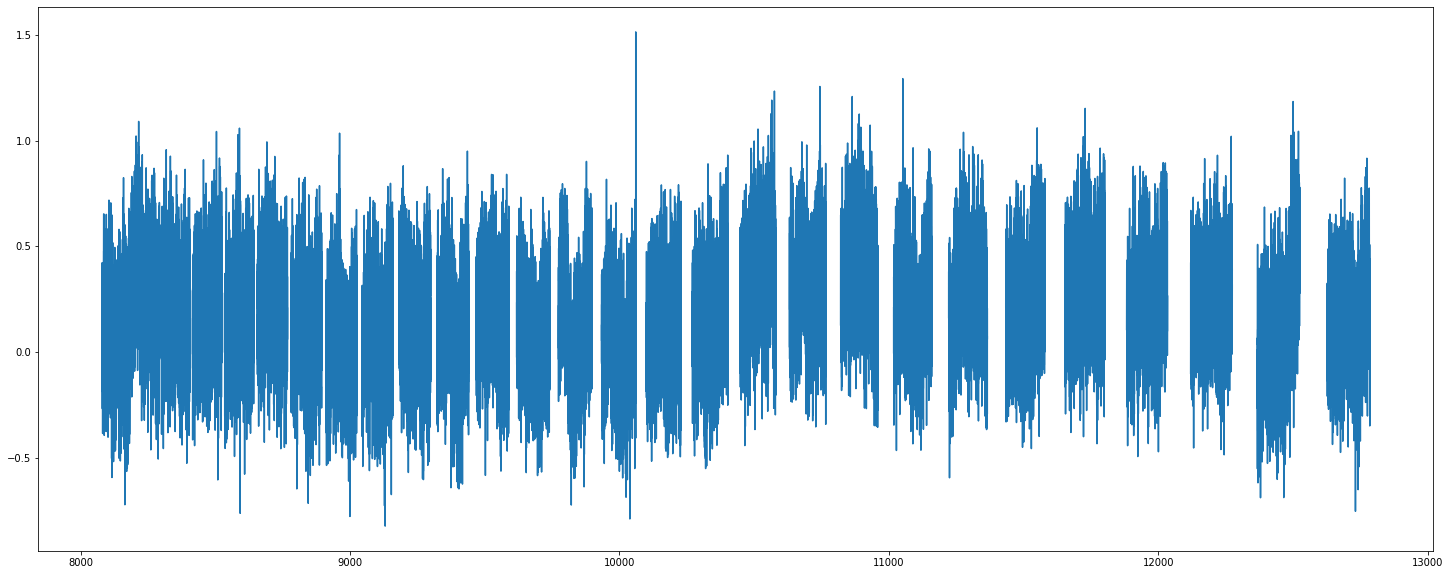

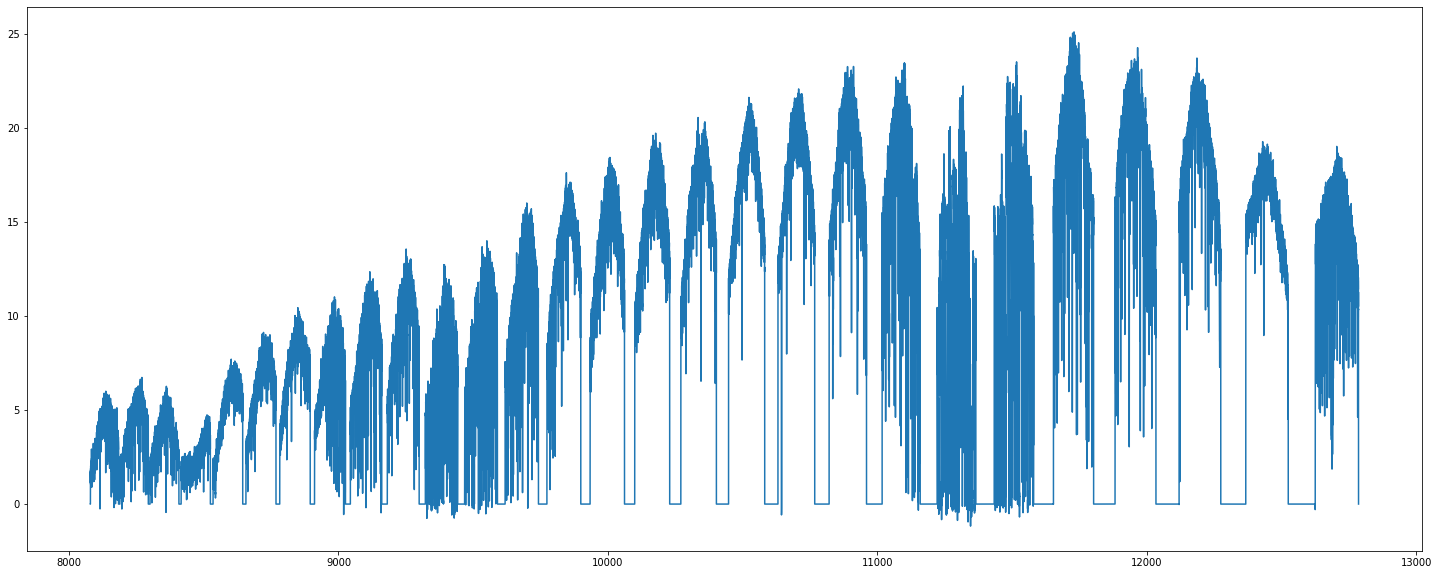

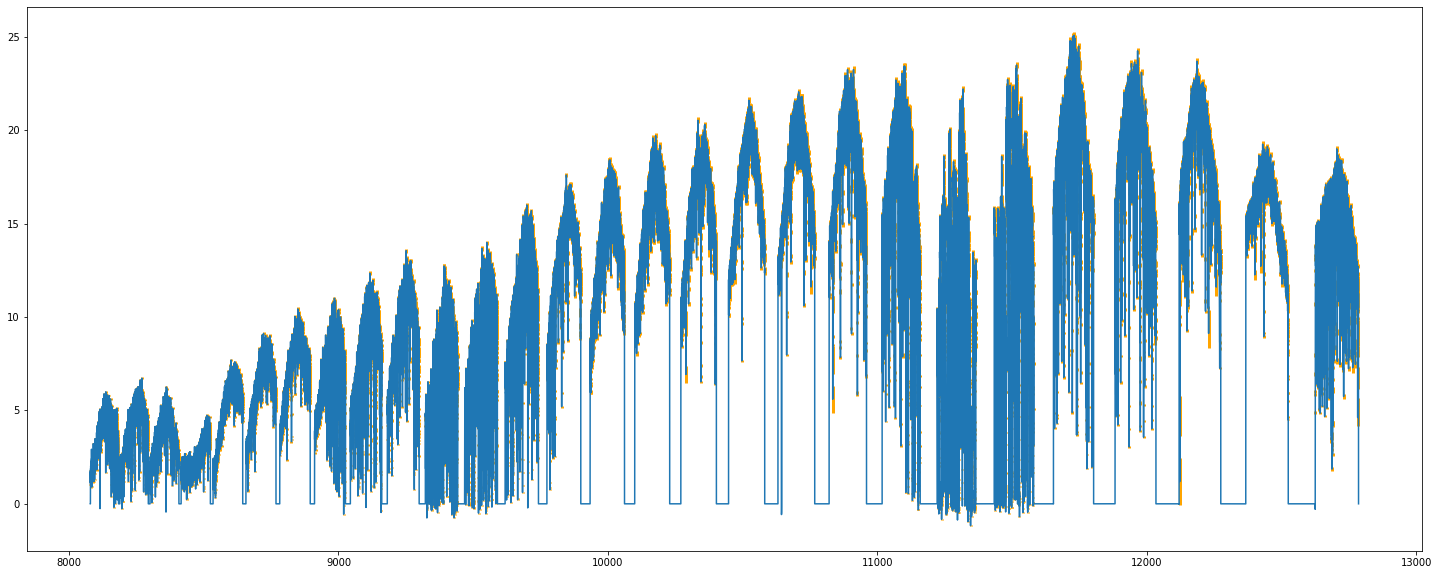

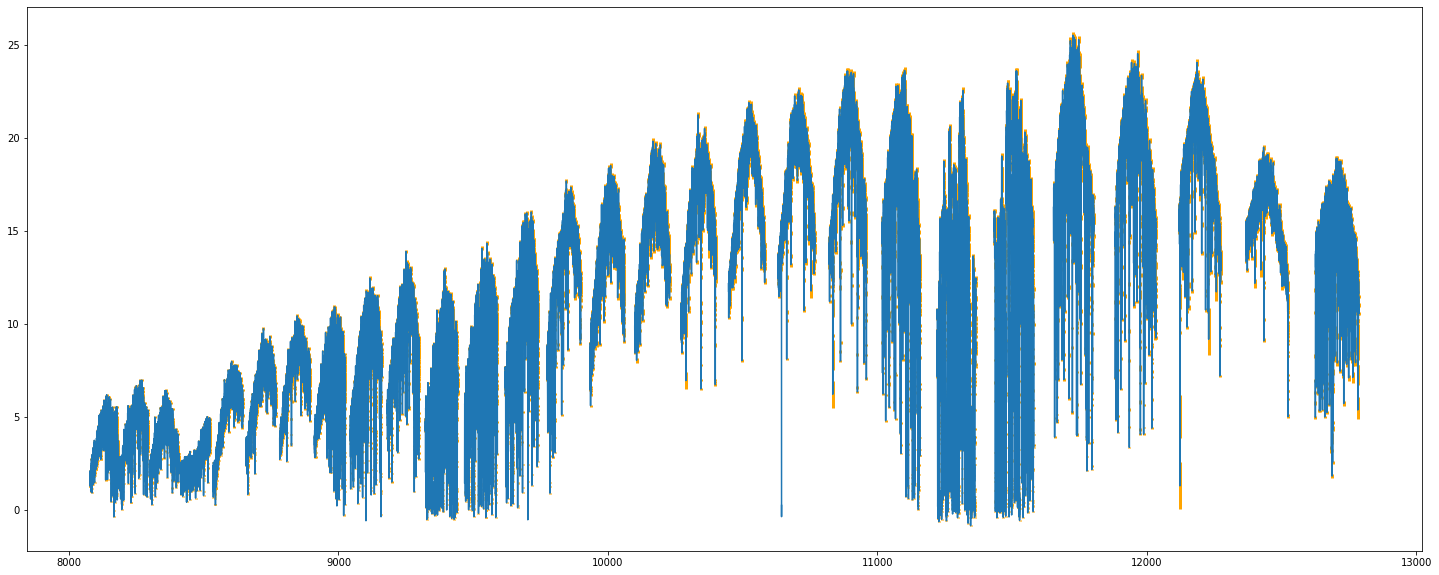

In [47]:
plt.plot(xsci,ysci)
plt.show()
plt.plot(xsky,ysky)
plt.show()
plt.plot(xcal,ycal)
plt.show()
plt.plot(xsci,subtractedy)
plt.show()
plt.errorbar(xsci,subtractedy,yerr=yscivar,ecolor='orange',elinewidth=3)
plt.show()
plt.errorbar(xsci,calibratedy,yerr=yscivar,ecolor='orange',elinewidth=3)
plt.show()

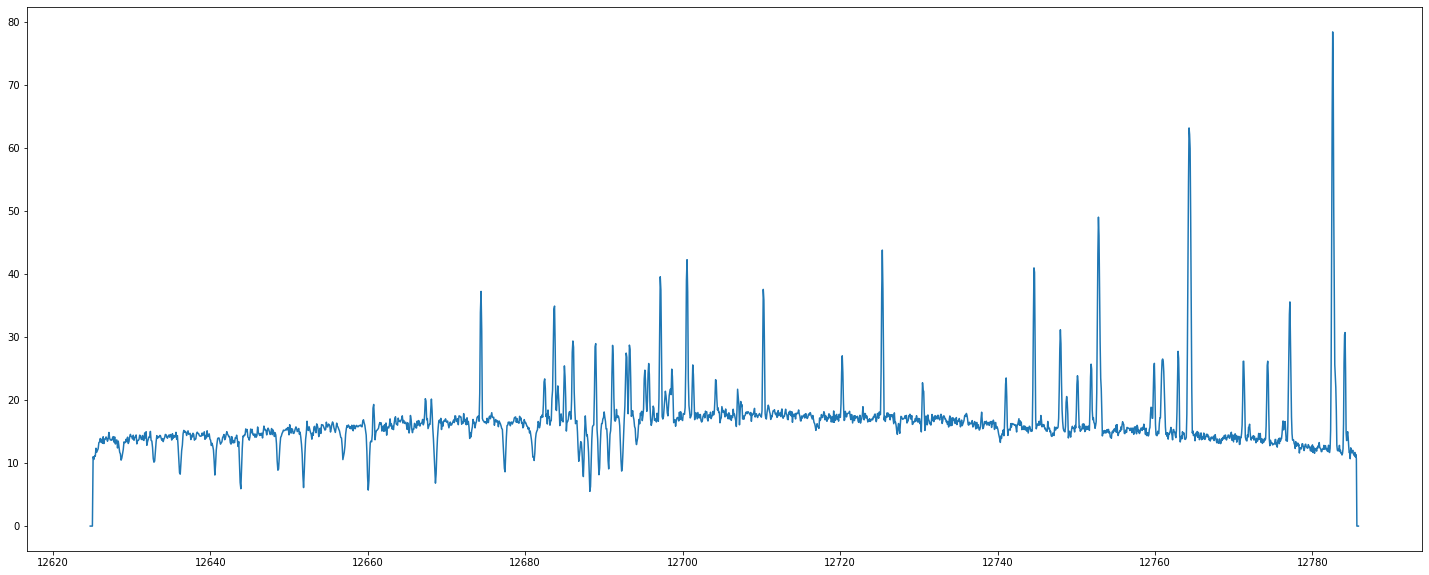

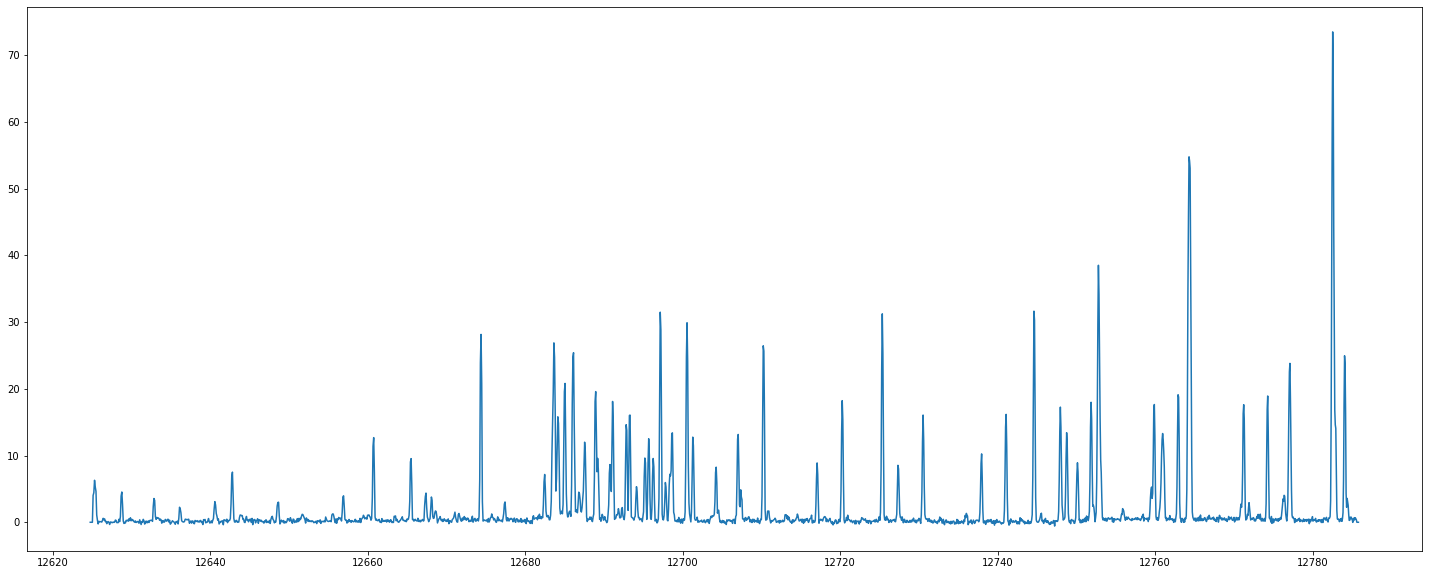

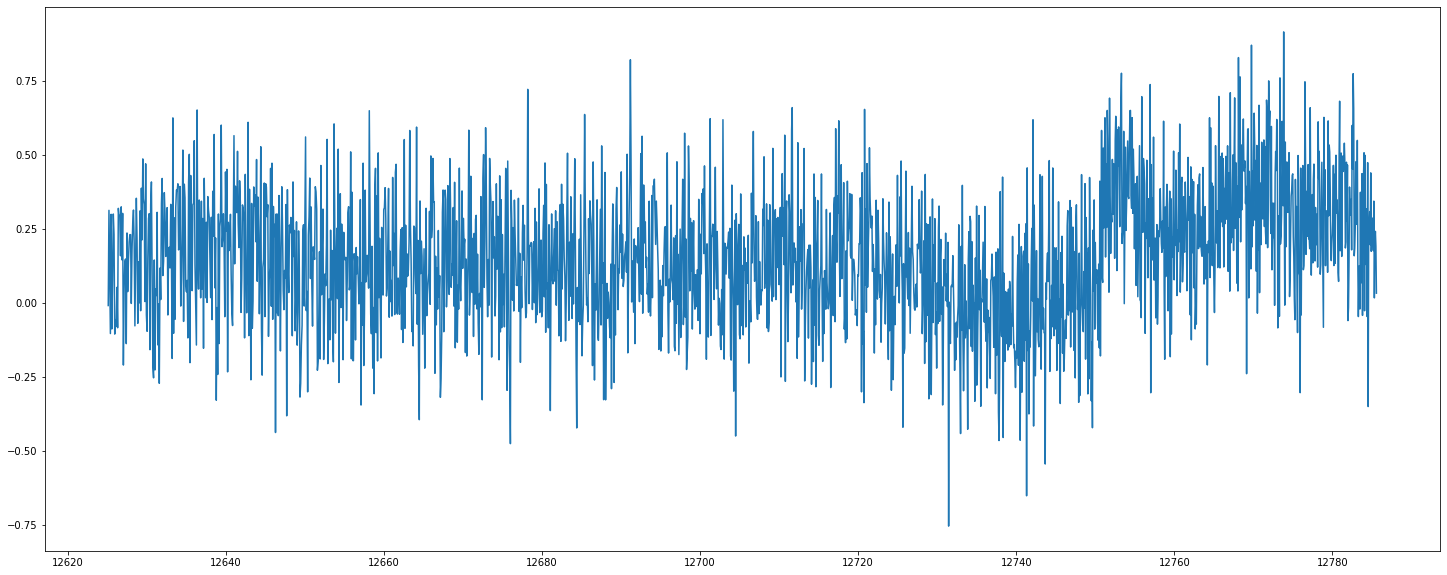

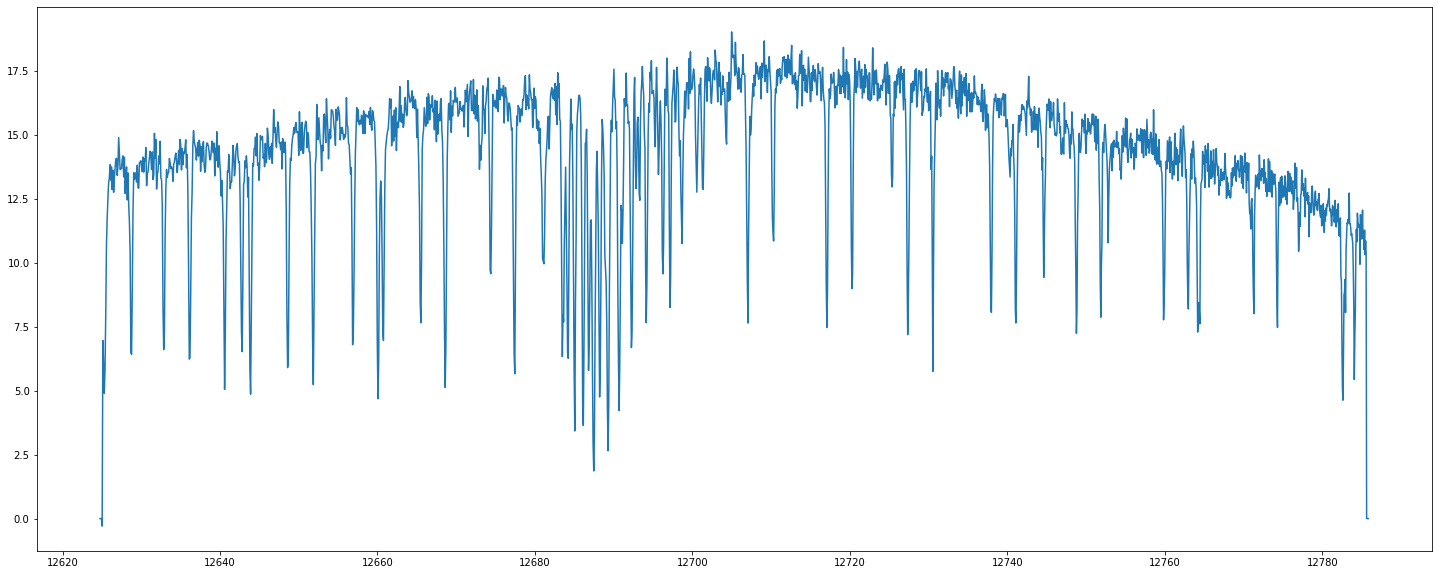

In [53]:
plt.plot(scix[-1],sci[-1])
plt.show()
plt.plot(skyx[-1],sky[-1])
plt.show()
plt.plot(calx[-1],cal[-1])
plt.show()
plt.plot(scix[-1],sci[-1]-np.interp(scix[-1],skyx[-1],sky[-1]))
plt.show()